# Import Libraries

In [100]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from imblearn.combine import SMOTEENN

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

#problem statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 



In [2]:
#importing the csv file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA: Exploratory Data Analysis

In [4]:
df.drop("customerID", axis=1, inplace=True)

In [5]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Number Data Type Columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


we don't have all the features here, let's include all of them

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


a lot of missing values , full of skewness

In [10]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (7043, 20)
Rows and Columns after dropping duplicates:  (7021, 20)


In [12]:
df.nunique().to_frame("Unique Values")

,Unique Values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


there ain't much unique values which is better but we have to get rid of skewness

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()

0.0        11
19.75       9
20.2        8
19.65       7
19.9        7
           ..
810.45      1
865.05      1
3442.15     1
3674.95     1
587.7       1
Name: TotalCharges, Length: 6531, dtype: int64

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

In [102]:
# converting object column in float datatype
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['SeniorCitizen'].dtype

dtype('O')

In [104]:
# imputing null values 
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [16]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number Data Type Columns are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


# Visualization

Minimum 0
Maximum 72


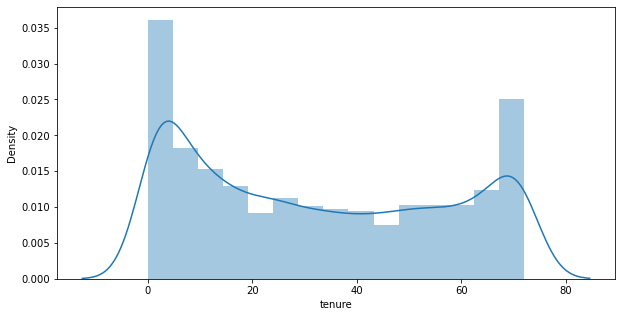

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(df['tenure'])
print('Minimum',df['tenure'].min())
print('Maximum',df['tenure'].max())

Minimum 0.0
Maximum 8684.8


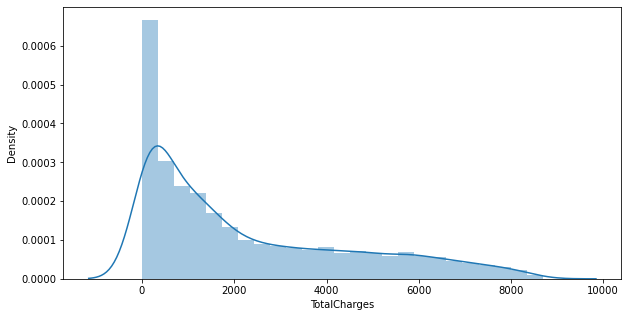

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(df['TotalCharges'])
print('Minimum',df['TotalCharges'].min())
print('Maximum',df['TotalCharges'].max())

Minimum 18.25
Maximum 118.75


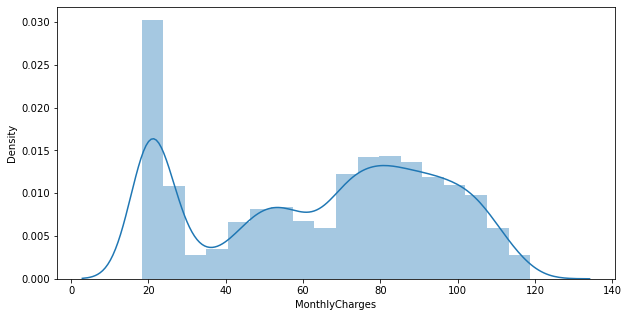

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df['MonthlyCharges'])
print('Minimum',df['MonthlyCharges'].min())
print('Maximum',df['MonthlyCharges'].max())

No     5164
Yes    1857
Name: Churn, dtype: int64

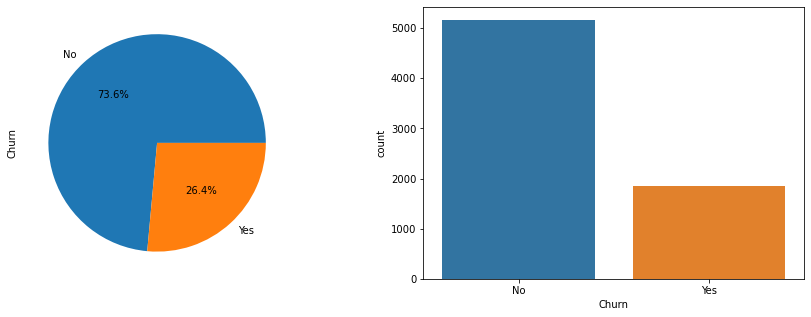

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(df['Churn'])
df['Churn'].value_counts()

In [23]:
def pier(df,col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(1,2,2)
    sns.countplot(df[col],hue='Churn',data=df)
    print(df[col].value_counts())

Male      3541
Female    3480
Name: gender, dtype: int64


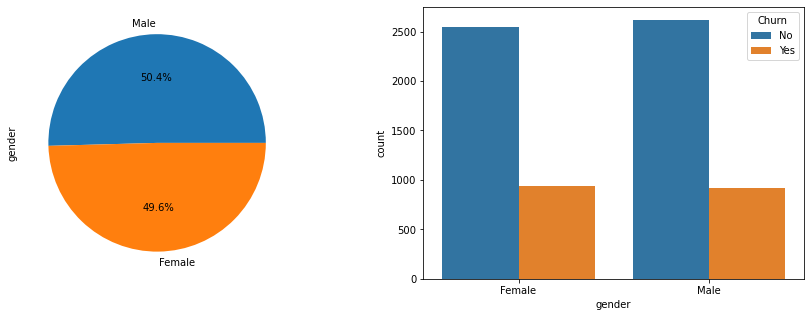

In [24]:
pier(df,'gender')

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


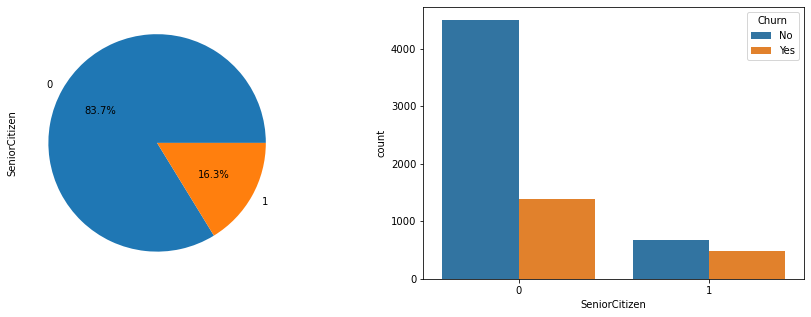

In [25]:
pier(df,'SeniorCitizen')

No     3619
Yes    3402
Name: Partner, dtype: int64


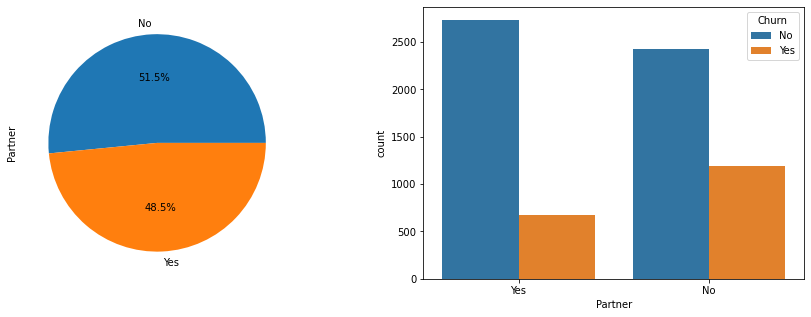

In [26]:
pier(df,'Partner')

No     4911
Yes    2110
Name: Dependents, dtype: int64


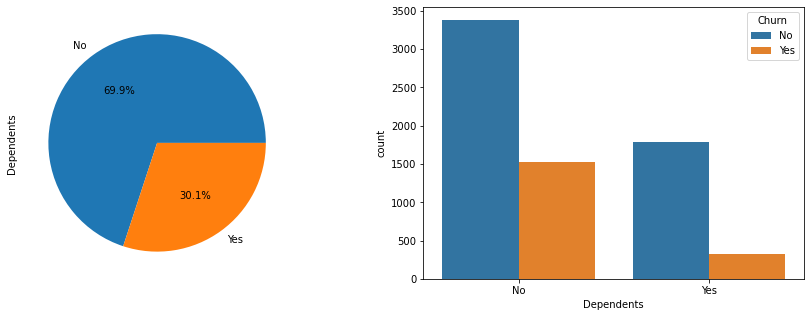

In [27]:
pier(df,'Dependents')

Yes    6339
No      682
Name: PhoneService, dtype: int64


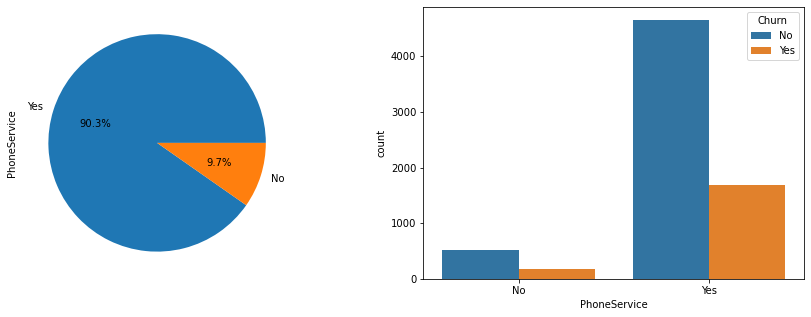

In [28]:
pier(df,'PhoneService')

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


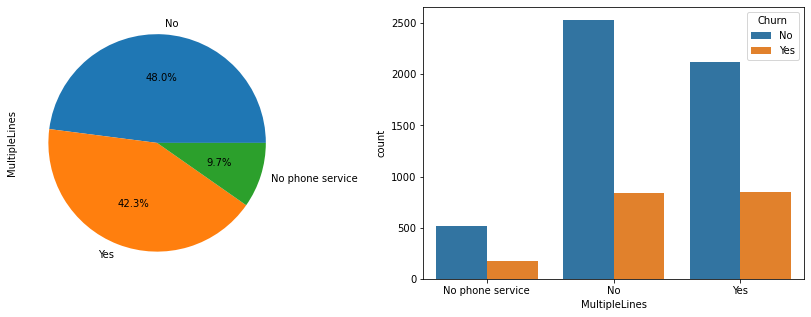

In [29]:
pier(df,'MultipleLines')

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


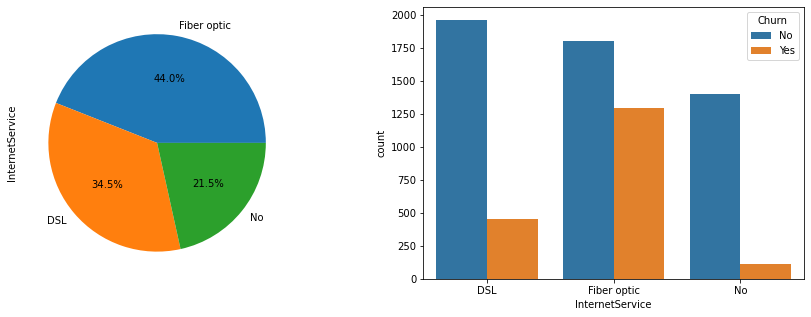

In [30]:
pier(df,'InternetService')

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


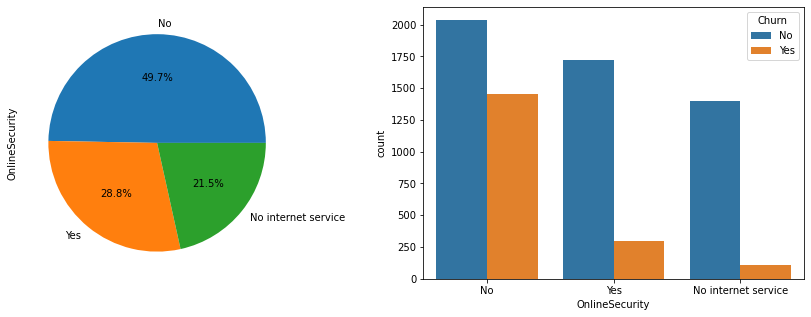

In [31]:
pier(df,'OnlineSecurity')

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


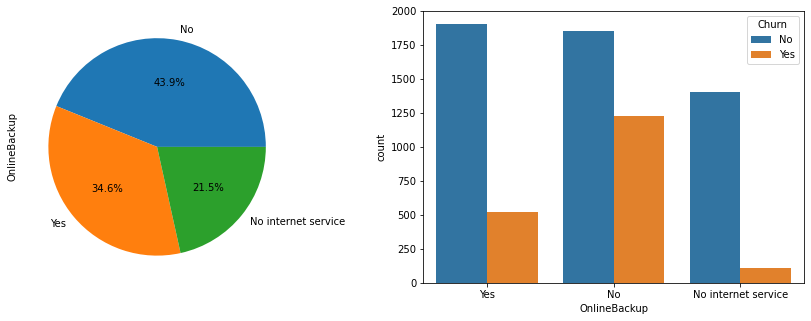

In [32]:
pier(df,'OnlineBackup')

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


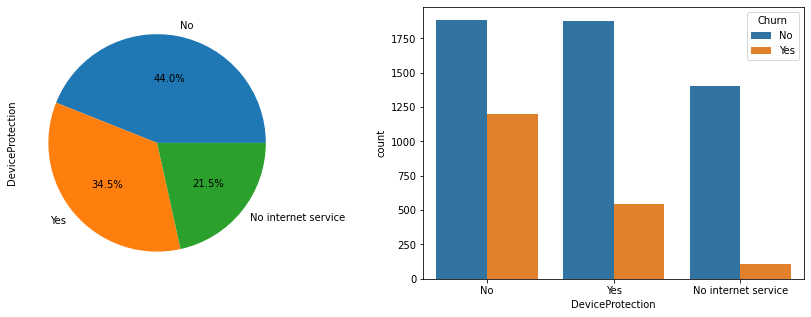

In [33]:
pier(df,'DeviceProtection')

No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64


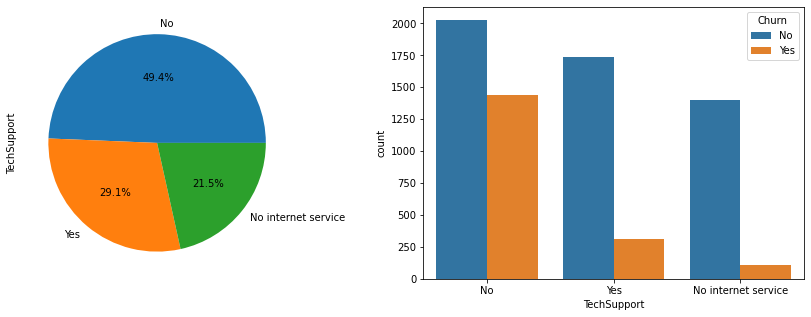

In [34]:
pier(df,'TechSupport')

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64


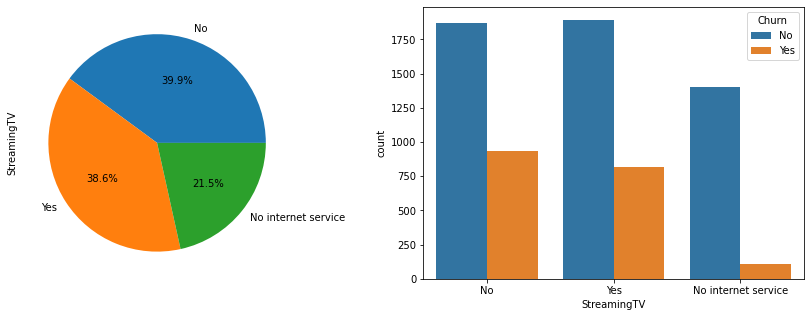

In [35]:
pier(df,'StreamingTV')


No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64


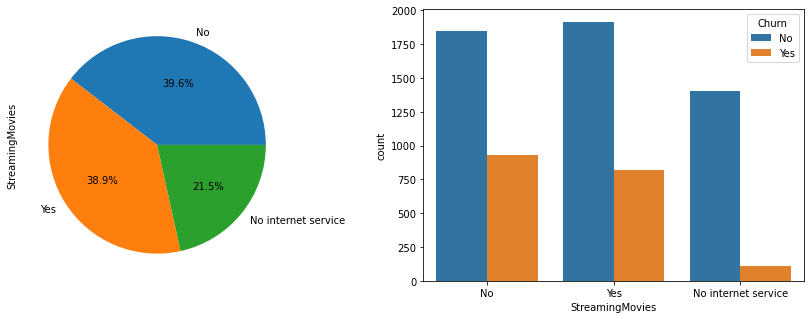

In [36]:
pier(df,'StreamingMovies')

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


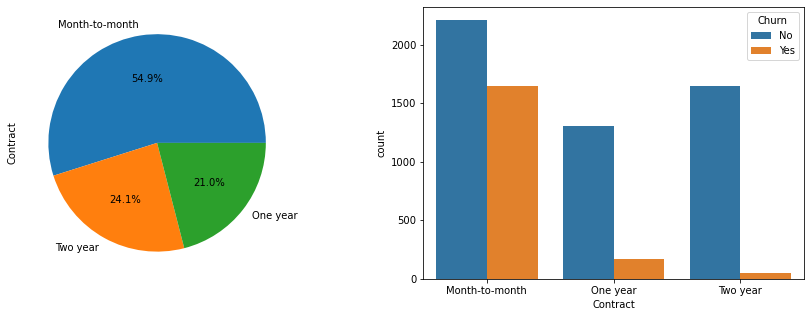

In [37]:
pier(df,'Contract')

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


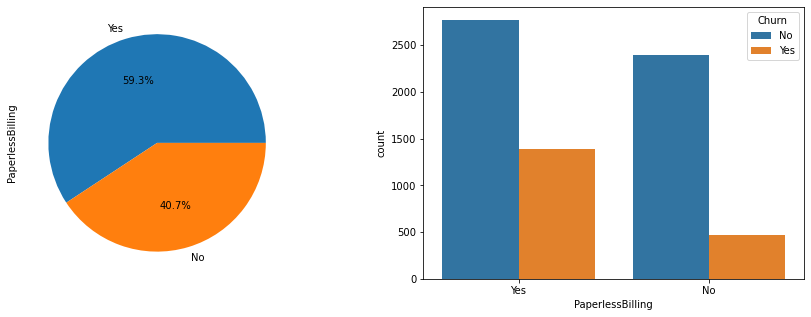

In [38]:
pier(df,'PaperlessBilling')

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


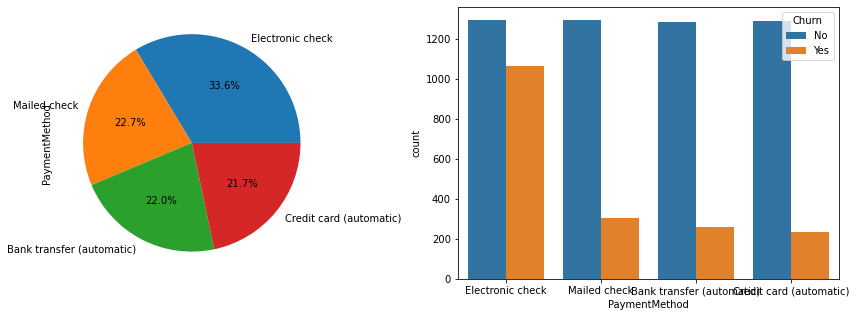

In [39]:
pier(df,'PaymentMethod')

In [40]:
con_features=df[['tenure','MonthlyCharges','TotalCharges']]   # instantiating continuous features into a single variable

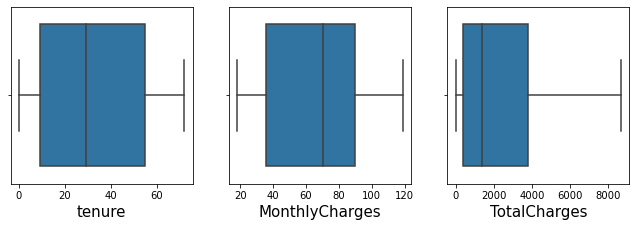

In [41]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(con_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show();

In [42]:
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959910
dtype: float64

In [43]:
#let's divide the target variable churn and features
y = df['Churn']
x = df.drop(columns=['Churn'])
x


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


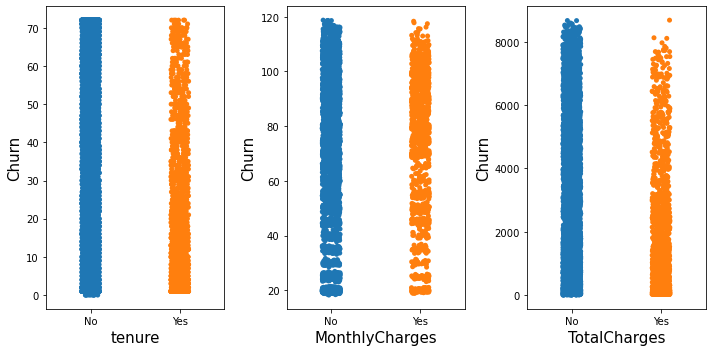

In [44]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.stripplot(y,con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plotnumber+=1
plt.tight_layout();

Encoding the target feature

In [47]:
l = LabelEncoder()
l_s = ['Churn']
for i in l_s:
    df[i] = l.fit_transform(df[i])

now , churn is endcode into 0 and 1.

checking the relation

In [51]:
def rel(df,col):
    plt.figure(figsize=(12,8))
    plt.title(col+ ' Vs Churn',fontsize=18)
    sns.countplot(df[col],hue='Churn',palette='mako',data=df)

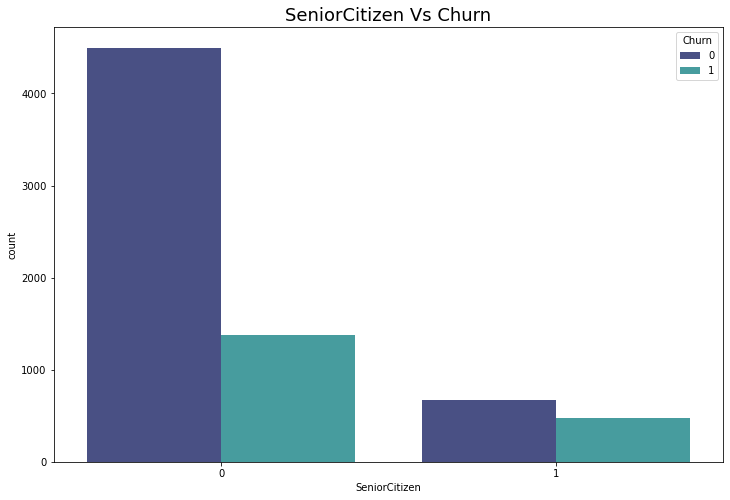

In [52]:
rel(df,'SeniorCitizen')

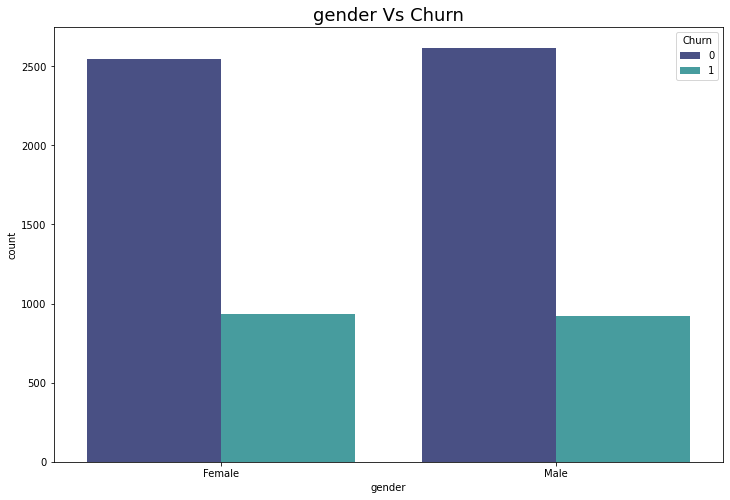

In [53]:
rel(df,'gender')

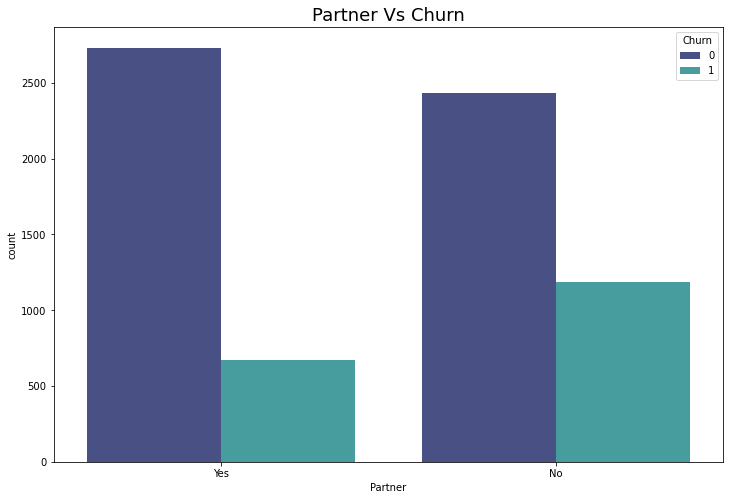

In [54]:
rel(df,'Partner')

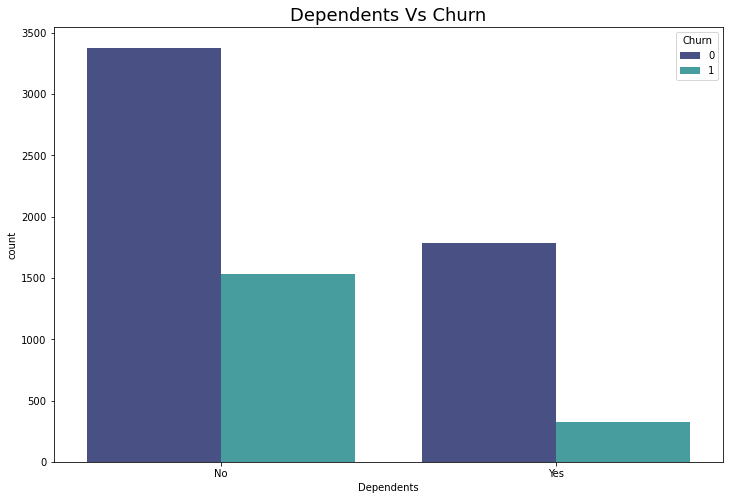

In [55]:
rel(df,'Dependents')

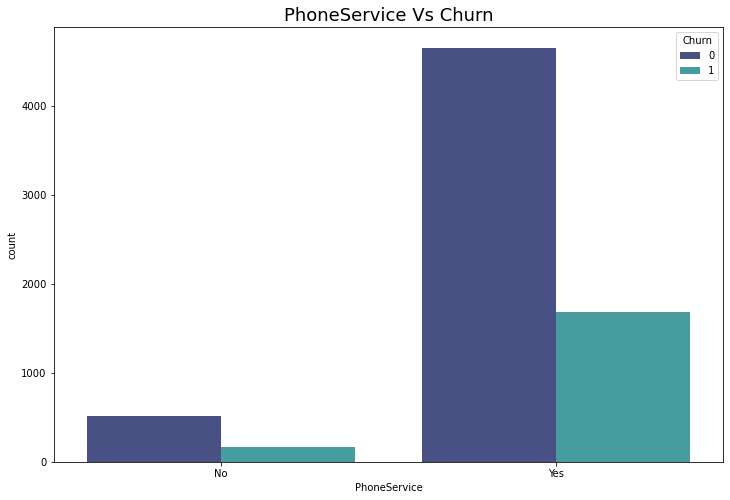

In [56]:
rel(df,'PhoneService')

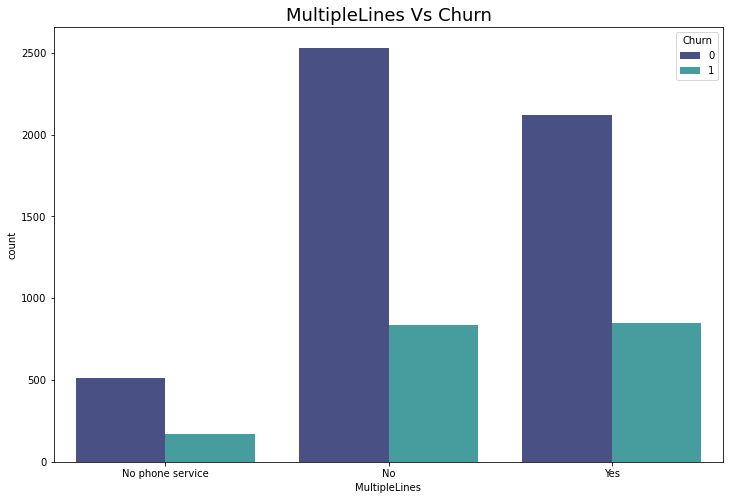

In [57]:
rel(df,'MultipleLines')

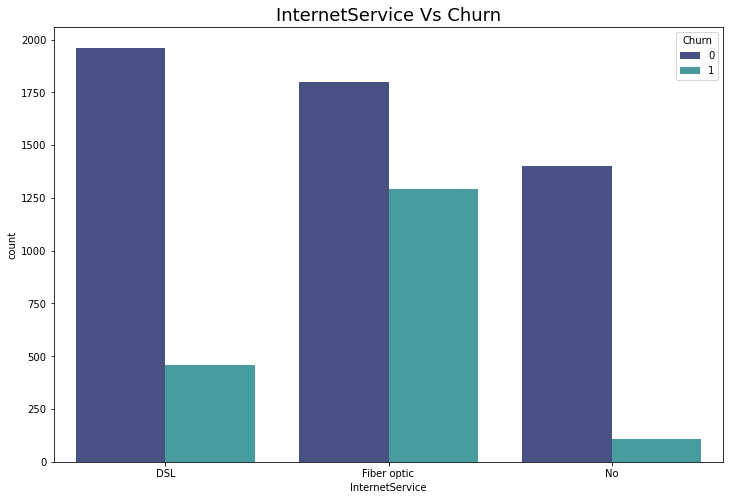

In [58]:
rel(df,'InternetService')

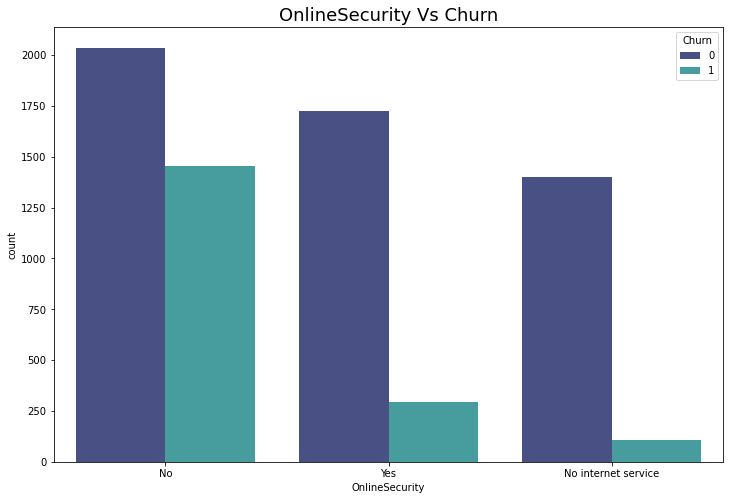

In [59]:
rel(df,'OnlineSecurity')

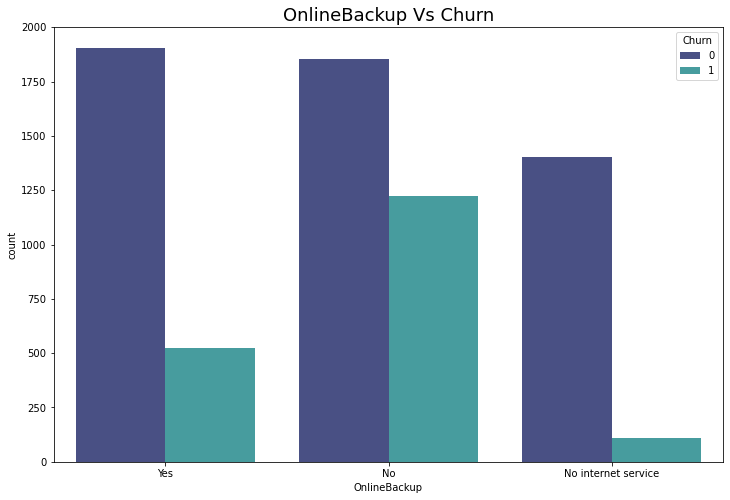

In [60]:
rel(df,'OnlineBackup')

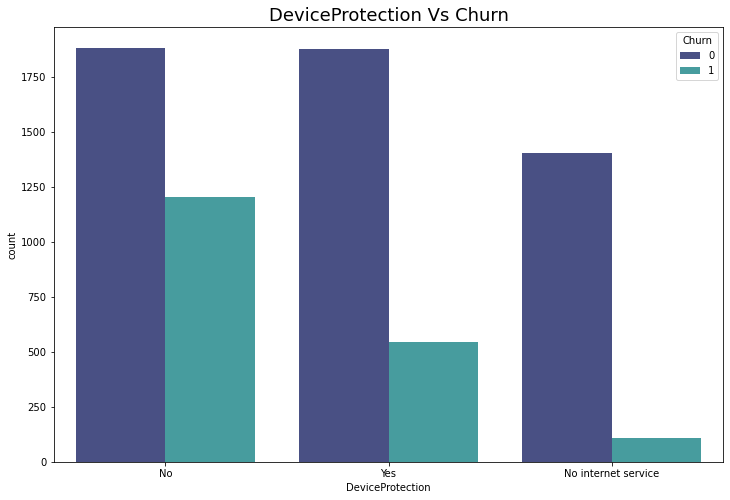

In [61]:
rel(df,'DeviceProtection')

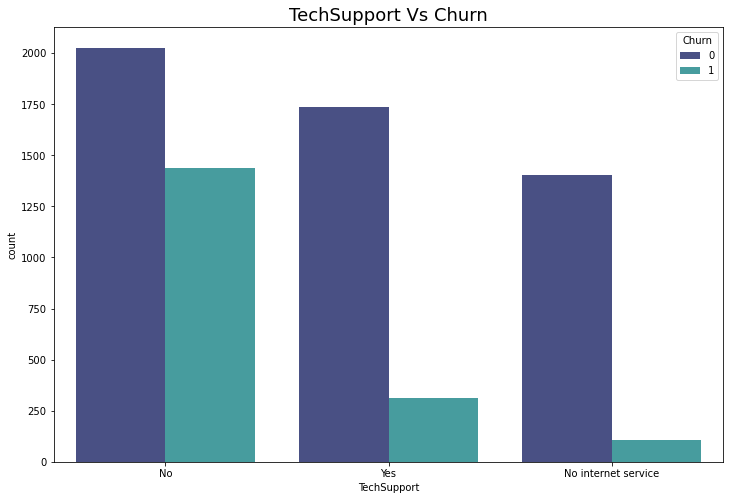

In [62]:
rel(df,'TechSupport')

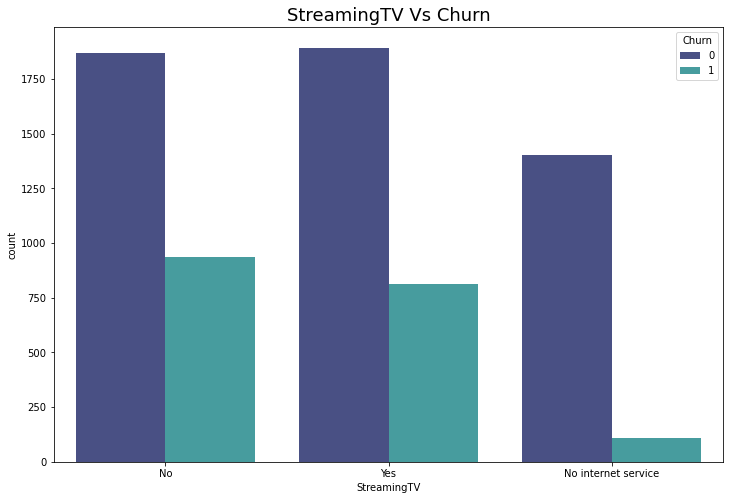

In [63]:
rel(df,'StreamingTV')

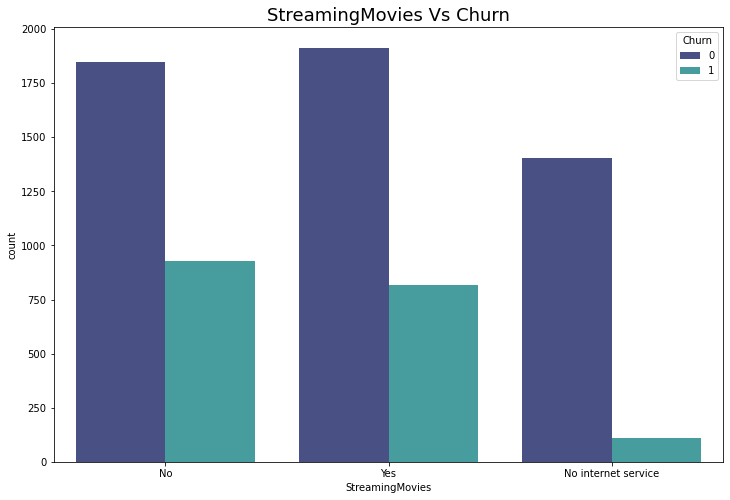

In [64]:
rel(df,'StreamingMovies')

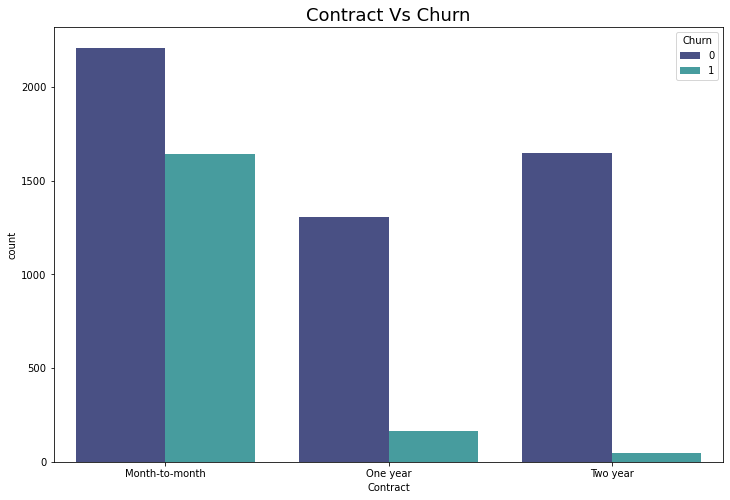

In [65]:
rel(df,'Contract')

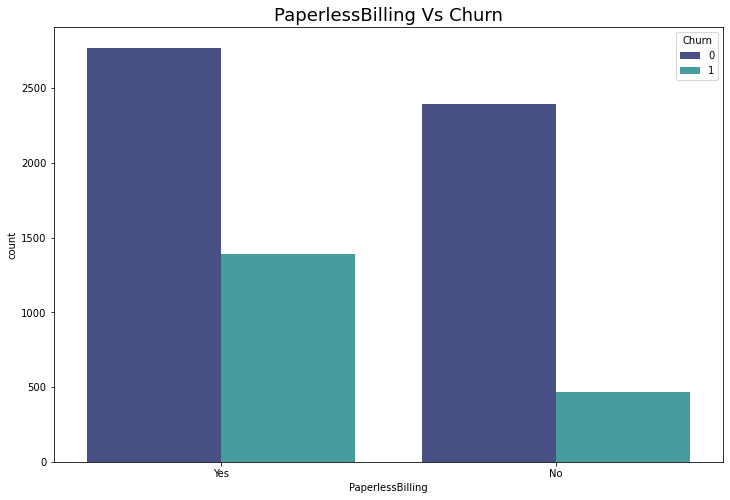

In [66]:
rel(df,'PaperlessBilling')

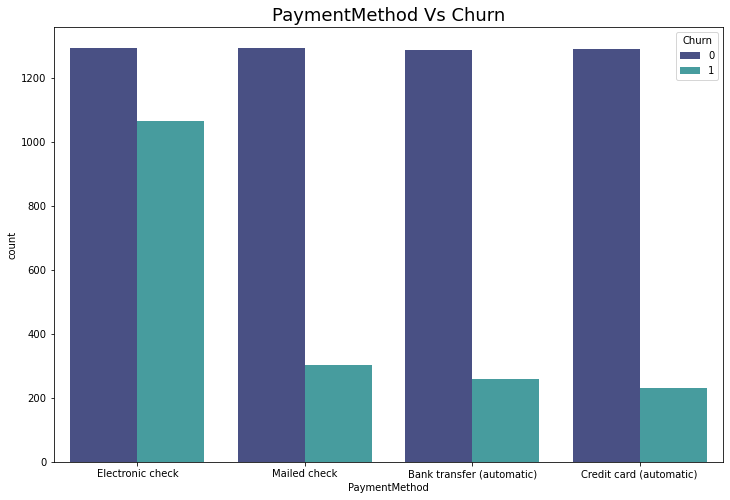

In [67]:
rel(df,'PaymentMethod')

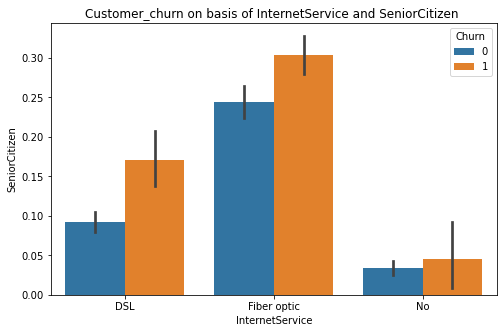

In [68]:
#Multivariate Analysis
plt.figure(figsize=(8,5))
sns.barplot(x='InternetService',y='SeniorCitizen',hue='Churn',data=df).set_title('Customer_churn on basis of InternetService and SeniorCitizen ')
plt.show()

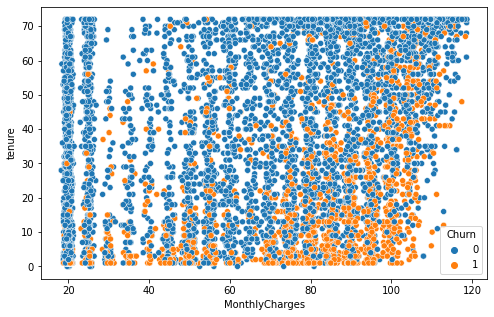

In [69]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='MonthlyCharges',y='tenure',hue='Churn',data=df)
plt.show();

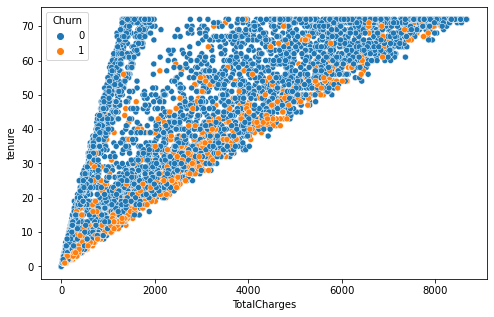

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',data=df)
plt.show()

In [71]:
#Plotting heatmap (correlation matrix):
corr=df.corr() #checking the shape first
corr.shape

(4, 4)

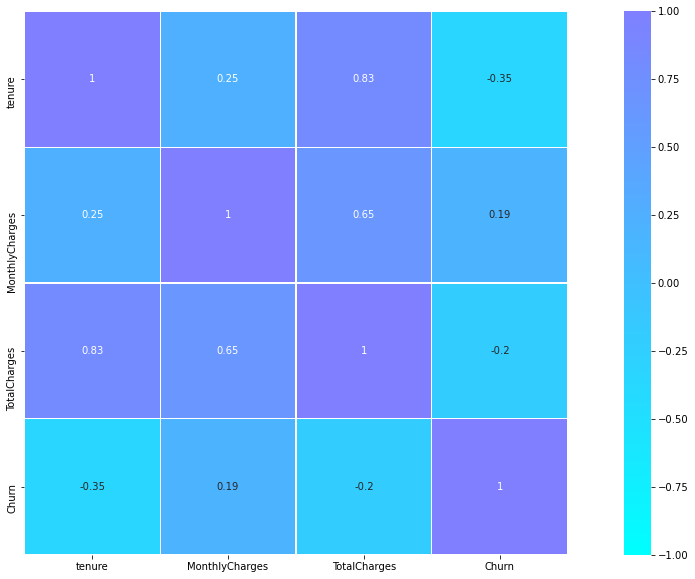

In [75]:
#Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
#Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(corr,cbar=True,cmap='cool',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

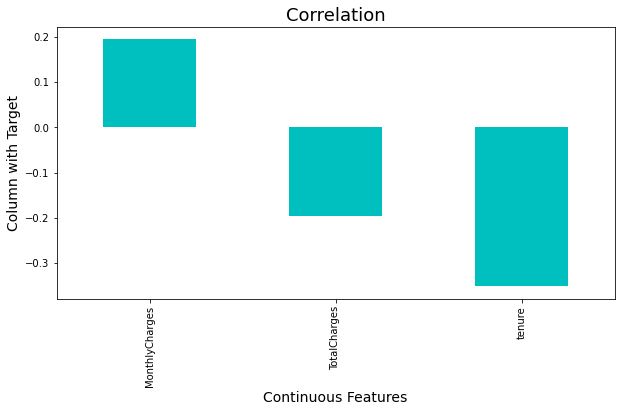

In [76]:
plt.figure(figsize=(10,5))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Continuous Features',fontsize=14)
plt.ylabel('Column with Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show();

feature engineering


In [78]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]  #12 months is the step size

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [81]:
drop_column=['tenure']  # Dropping  unnecessary columns
df=df.drop(columns=drop_column,axis=1)

In [82]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


# Encoding

In [84]:
df_dum = pd.get_dummies(df)
df_dum.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [106]:
#check the correlation once again:
corr=df_dum.corr()
corr.shape

(52, 52)

# Skewing the data

In [107]:
df.skew()

SeniorCitizen     1.829987
MonthlyCharges   -0.224097
TotalCharges      0.959910
Churn             1.068139
dtype: float64

In [90]:
#removing skewness
# We are taking all the skewed continuous feature into single variable
features=['TotalCharges']
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method
df_dum[features]=scaler.fit_transform(df[features].values) #scaling the feature
df_dum[features]

,TotalCharges
0,-1.803484
1,0.249639
2,-1.385139
3,0.228555
4,-1.249207
...,...
7038,0.292068
7039,1.568547
7040,-0.861594
7041,-0.924321


# Splitting the dataset into 2 variables 

In [110]:
x = df_dum.drop('Churn', axis=1)
y = df_dum['Churn']

# Sampling

In [111]:
y.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [112]:
## Over sampling our data
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

[0.1190609  0.14223137 0.02193408 0.0219424  0.01449584 0.01493599
 0.01821173 0.01862699 0.01480246 0.01534282 0.00318602 0.0032709
 0.01500773 0.00303905 0.01470515 0.01354939 0.02385966 0.00474908
 0.02409568 0.00378154 0.01216884 0.0198753  0.00229953 0.01427112
 0.01812433 0.00261527 0.01538581 0.02846759 0.00217145 0.01220032
 0.0138962  0.00174453 0.01388926 0.01391498 0.00175321 0.01438797
 0.06355338 0.01231539 0.01959828 0.0164871  0.01626319 0.01492164
 0.01534599 0.03349509 0.0128409  0.0397404  0.01272915 0.01162192
 0.01094622 0.01015689 0.01199002]


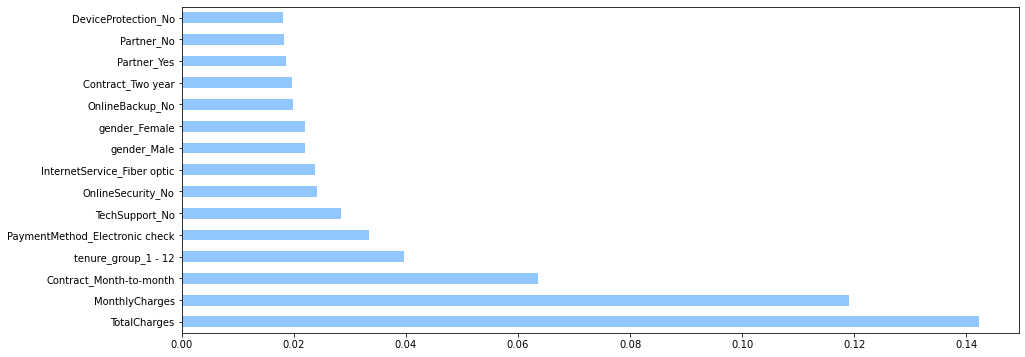

In [113]:
  from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(x,y)
##use inbuilt class feature_importances of tree based classifiers
print(selection.feature_importances_)
# for plotting
plt.figure(figsize=(15,6))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Best randomstate

In [114]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X_resampled1,y_resampled1,test_size=.20,random_state=i,stratify=y_resampled1) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# LogisticRegression

max accuracy score corresponding to 46 is 95.68452380952381


cross validation score 80.6152223945818


Standard Deviation 0.9856605327991528


F1 score 95.9748427672956


Training accuracy 94.78778853313477


Test Accuracy 95.23809523809523


Confusion Matrix [[517  27]
 [ 37 763]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.95      0.94       544
           1       0.97      0.95      0.96       800

    accuracy                           0.95      1344
   macro avg       0.95      0.95      0.95      1344
weighted avg       0.95      0.95      0.95      1344



Roc_auc Score 95.20588235294116





46

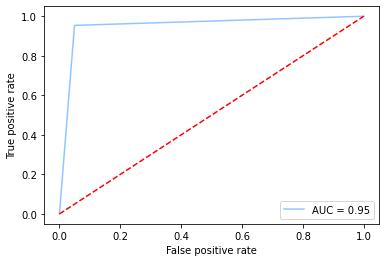

In [115]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

# DecisionTreeClassifier

max accuracy score corresponding to 49 is 95.38690476190477


cross validation score 72.35417870649188


Standard Deviation 1.5114315305224346


F1 score 94.63840399002494


Training accuracy 100.0


Test Accuracy 93.60119047619048


Confusion Matrix [[499  45]
 [ 41 759]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.92      0.92       544
           1       0.94      0.95      0.95       800

    accuracy                           0.94      1344
   macro avg       0.93      0.93      0.93      1344
weighted avg       0.94      0.94      0.94      1344



Roc_auc Score 93.30147058823528





49

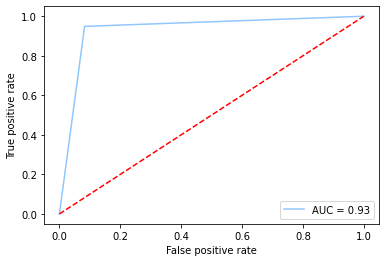

In [116]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

# KNN

max accuracy score corresponding to 66 is 97.09821428571429


cross validation score 76.79804523932637


Standard Deviation 0.9505506859210333


F1 score 97.00305810397553


Training accuracy 97.82204020848846


Test Accuracy 96.35416666666666


Confusion Matrix [[502  42]
 [  7 793]]


Classification Report               precision    recall  f1-score   support

           0       0.99      0.92      0.95       544
           1       0.95      0.99      0.97       800

    accuracy                           0.96      1344
   macro avg       0.97      0.96      0.96      1344
weighted avg       0.96      0.96      0.96      1344



Roc_auc Score 95.70220588235294





66

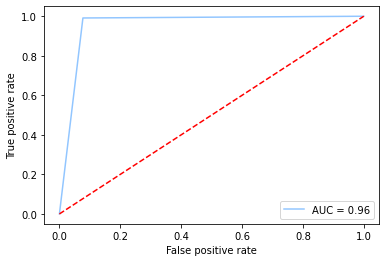

In [117]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# Naive Bayes

max accuracy score corresponding to 92 is 92.11309523809523


cross validation score 70.47420182295626


Standard Deviation 0.464043283809827


F1 score 93.06930693069307


Training accuracy 90.48771407297096


Test Accuracy 91.66666666666666


Confusion Matrix [[480  64]
 [ 48 752]]


Classification Report               precision    recall  f1-score   support

           0       0.91      0.88      0.90       544
           1       0.92      0.94      0.93       800

    accuracy                           0.92      1344
   macro avg       0.92      0.91      0.91      1344
weighted avg       0.92      0.92      0.92      1344



Roc_auc Score 91.11764705882352





92

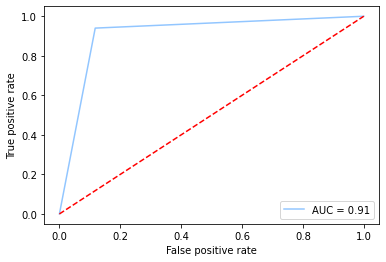

In [118]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

# Random forest

max accuracy score corresponding to 49 is 97.54464285714286


cross validation score 78.46440774198781


Standard Deviation 1.1054077230797255


F1 score 97.14993804213134


Training accuracy 100.0


Test Accuracy 96.57738095238095


Confusion Matrix [[514  30]
 [ 16 784]]


Classification Report               precision    recall  f1-score   support

           0       0.97      0.94      0.96       544
           1       0.96      0.98      0.97       800

    accuracy                           0.97      1344
   macro avg       0.97      0.96      0.96      1344
weighted avg       0.97      0.97      0.97      1344



Roc_auc Score 96.24264705882352





49

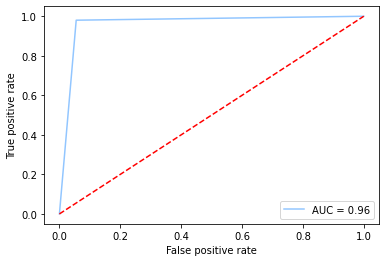

In [120]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

# AdaBoostClassifier

max accuracy score corresponding to 92 is 94.41964285714286


cross validation score 80.27331163630096


Standard Deviation 0.6446731655508273


F1 score 94.8860135551448


Training accuracy 93.52196574832465


Test Accuracy 93.82440476190477


Confusion Matrix [[491  53]
 [ 30 770]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.90      0.92       544
           1       0.94      0.96      0.95       800

    accuracy                           0.94      1344
   macro avg       0.94      0.93      0.94      1344
weighted avg       0.94      0.94      0.94      1344



Roc_auc Score 93.25367647058823





92

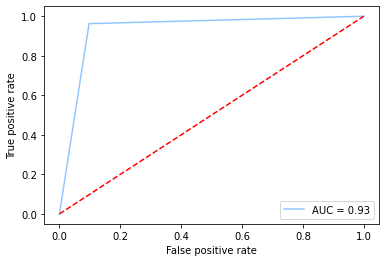

In [121]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

# Gardient Boost

max accuracy score corresponding to 75 is 95.98214285714286


cross validation score 80.60094696393628


Standard Deviation 0.8862382174701666


F1 score 96.21822690638561


Training accuracy 95.77438570364855


Test Accuracy 95.46130952380952


Confusion Matrix [[507  37]
 [ 24 776]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.93      0.94       544
           1       0.95      0.97      0.96       800

    accuracy                           0.95      1344
   macro avg       0.95      0.95      0.95      1344
weighted avg       0.95      0.95      0.95      1344



Roc_auc Score 95.09926470588235





75

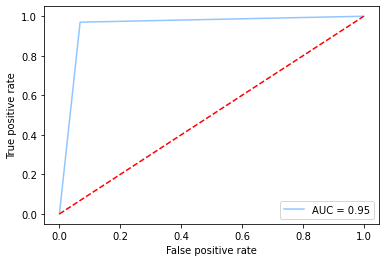

In [122]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

Adaboostclassifier is our best model among all because it givers us a very good accuracy & f 1 score with least difference with cross validation score so we will Adaboostclassifier as our best model.

The Accuracy is 94.41964285714286%

# Saving Model


In [131]:
import joblib
joblib.dump(lr,'Customer churn Analysis.obj')

['Customer churn Analysis.obj']

# Loading model

In [133]:

lr_from_joblib=joblib.load('Customer churn Analysis.obj')
lr_from_joblib.predict(x_test)

array([0, 1, 0, ..., 1, 0, 1])